<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [19]:
# Folder containing the CSV files
data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'

!cp -r /content/drive/MyDrive/p1_exposure/* /content/drive/MyDrive/CCRI/ccri_repo/data/p1_exposure/




In [20]:
path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    #chose 'state' only
    df =  df[df['type'] == 'State']
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")

agricultural_drought: 1355471744.480265
air_pollution: 2306878144.2254567
coastal_flood: 32443795.13821765
drought_spei: 1043049198.879181
drought_spi: 981062855.2350885
extreme_heat: 1137157758.8402998
fire_frequency: 141669969.391057
fire_FRP: 87813465.50804812
heatwave_duration: 1070842205.2374173
heatwave_frequency: 1076391554.956932
heatwave_severity: 327958426.90578234
river_flood: 349523094.6166651
sand_dust: 130437213.79968366
tropical_storm: 661678866.3937566
vectorborne_malariapf: 704604649.4345363
vectorborne_malariapv: 626397308.2166294


Hazard data normalization test with plots

In [21]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [22]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

In [23]:
iso3_name = 'iso3'
adm_name = 'adm0_name'

processed : agricultural_drought min: 0.1 max: 8.570420468202386
agricultural_drought: Log Transformation and Scaling - skew=-0.583, kurtosis=-1.284
IQR processed : agricultural_drought min: -9.253331181117135 max: 15.688885301861891


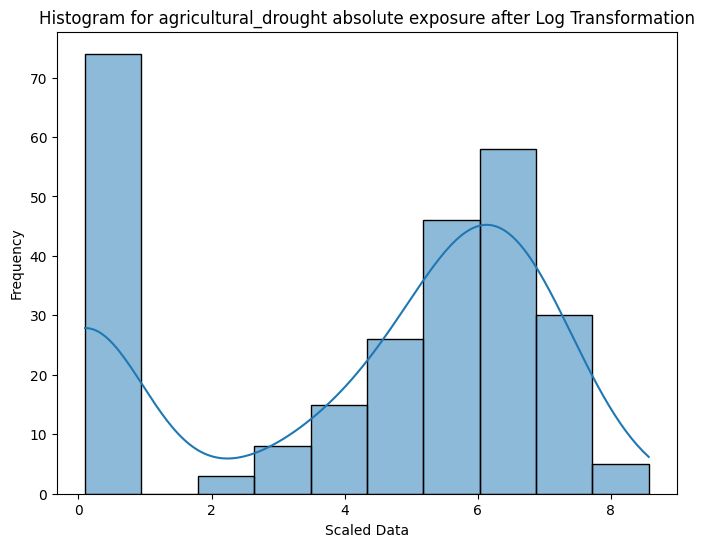

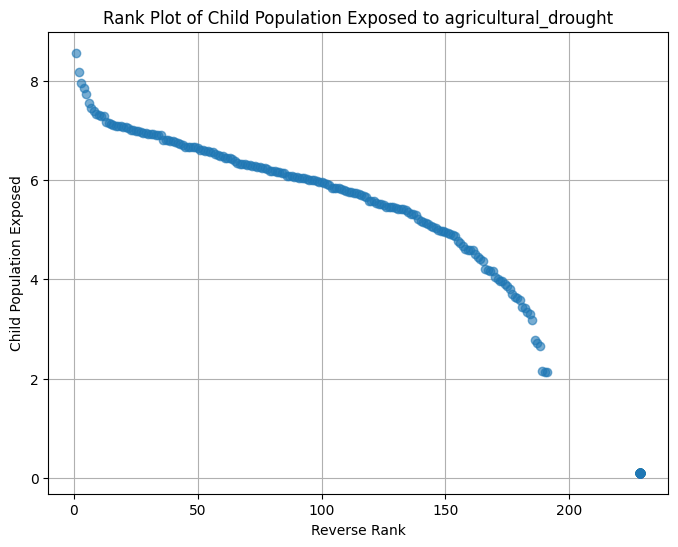

processed : air_pollution min: 0.1 max: 8.628020151301628
air_pollution: Log Transformation and Scaling - skew=-1.092, kurtosis=0.042
IQR processed : air_pollution min: -0.19885173826510893 max: 10.999244955292657


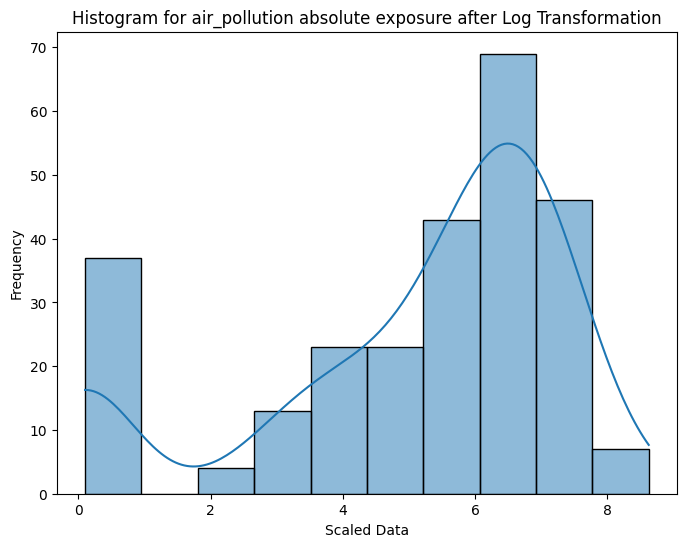

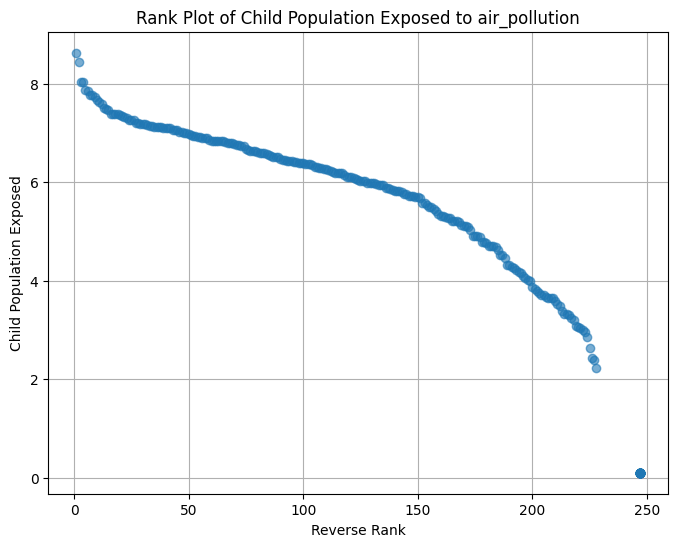

processed : coastal_flood min: 0.1 max: 7.107089774826257
coastal_flood: Log Transformation and Scaling - skew=0.256, kurtosis=-1.328
IQR processed : coastal_flood min: -5.4463266819427565 max: 9.343877803237927


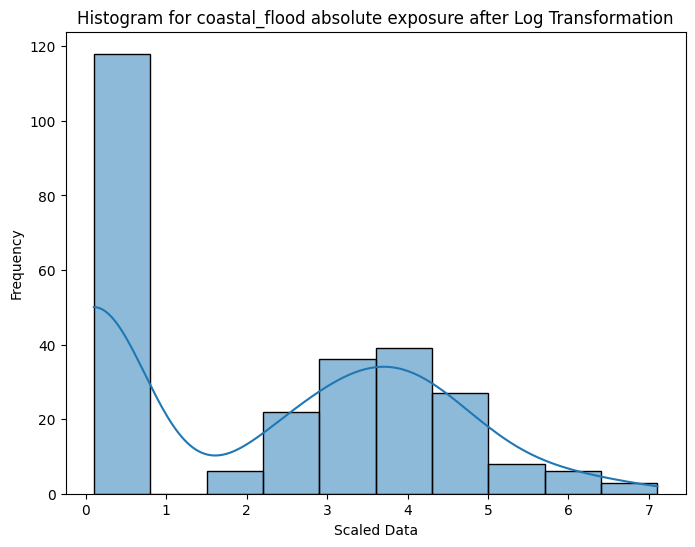

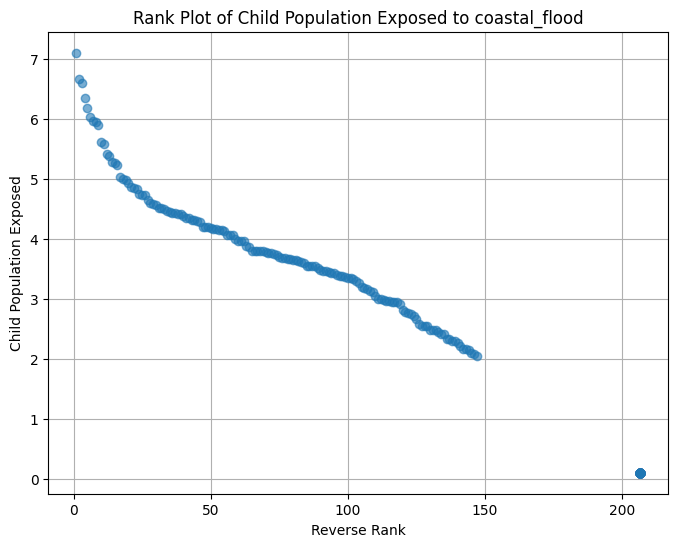

processed : drought_spei min: 0.1 max: 8.430925333673176
drought_spei: Log Transformation and Scaling - skew=-0.334, kurtosis=-1.504
IQR processed : drought_spei min: -9.027631623756603 max: 15.31271937292767


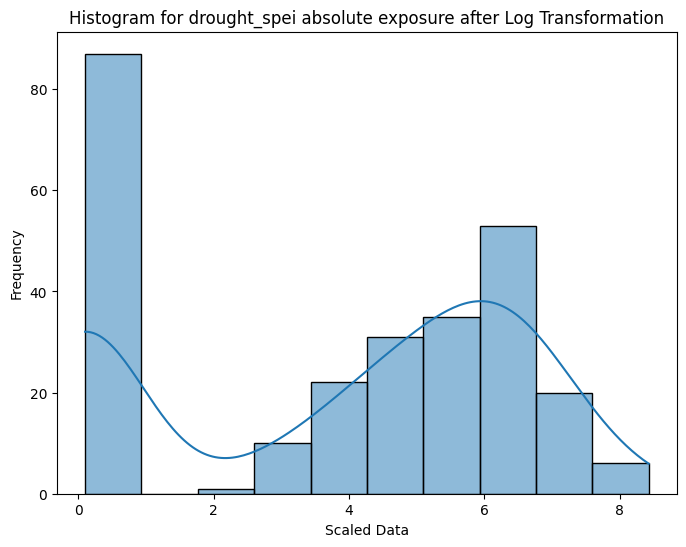

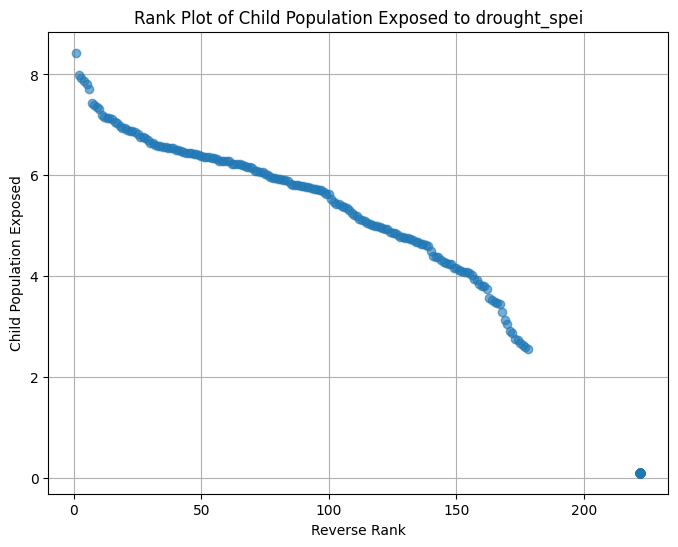

processed : drought_spi min: 0.1 max: 8.180468510116135
drought_spi: Log Transformation and Scaling - skew=-0.343, kurtosis=-1.611
IQR processed : drought_spi min: -9.129466114709208 max: 15.482443524515347


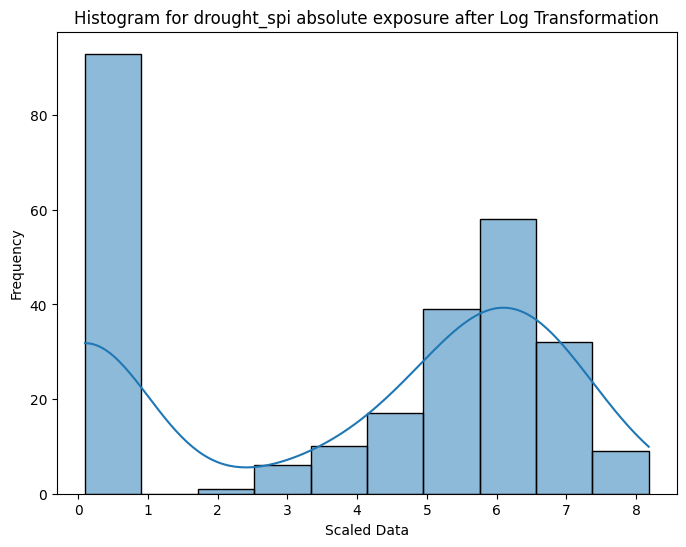

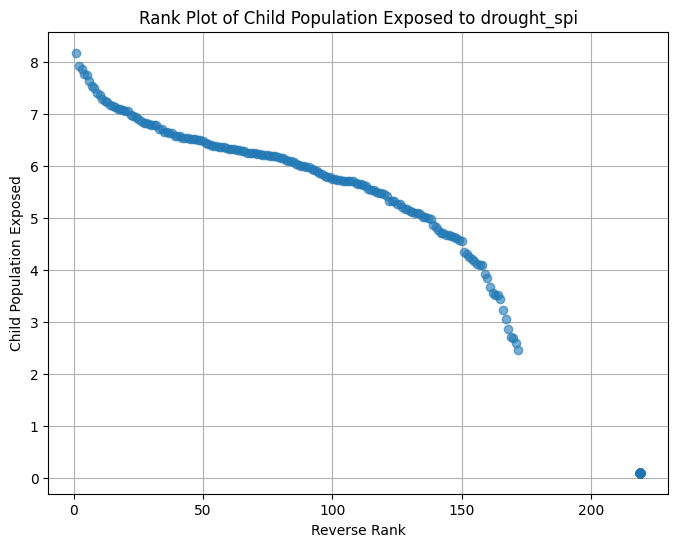

processed : extreme_heat min: 0.1 max: 8.594684972388997
extreme_heat: Log Transformation and Scaling - skew=0.350, kurtosis=-1.711
IQR processed : extreme_heat min: -8.987376879997461 max: 15.2456281333291


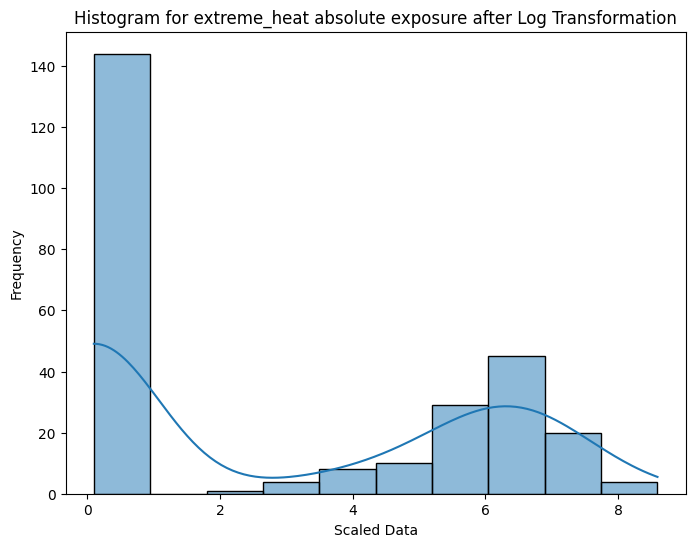

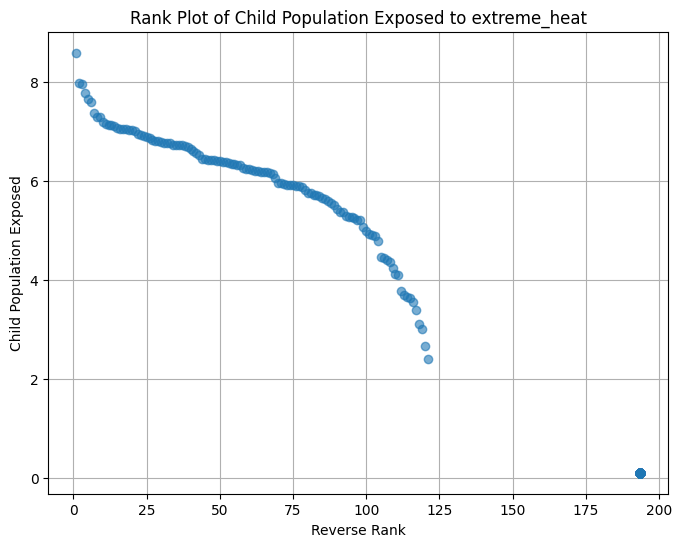

processed : fire_frequency min: 0.1 max: 7.350459479749705
fire_frequency: Log Transformation and Scaling - skew=-0.206, kurtosis=-1.514
IQR processed : fire_frequency min: -7.533222152738584 max: 12.822036921230971


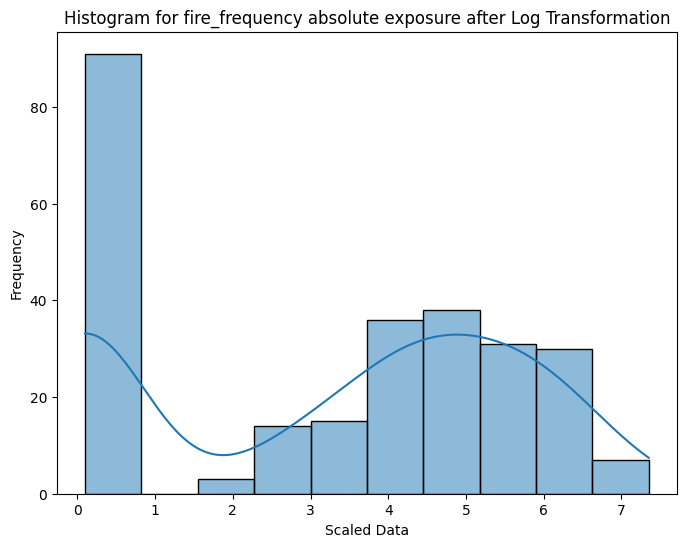

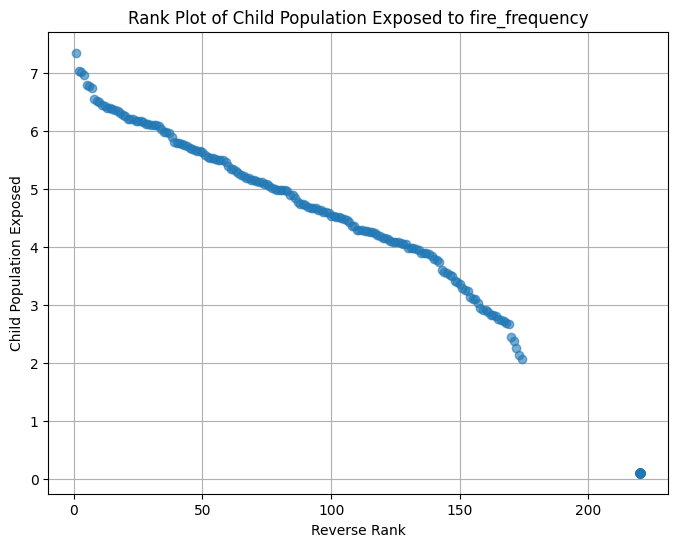

processed : fire_FRP min: 0.1 max: 6.877619634009618
fire_FRP: Log Transformation and Scaling - skew=-0.440, kurtosis=-1.453
IQR processed : fire_FRP min: -7.825246516391737 max: 13.308744193986229


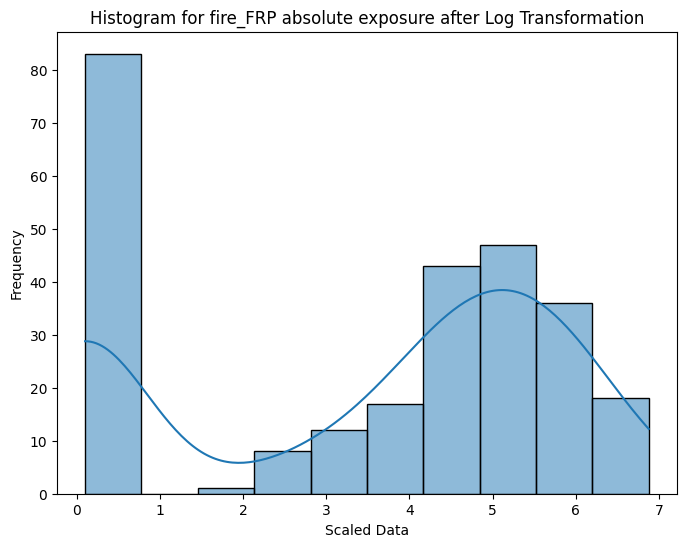

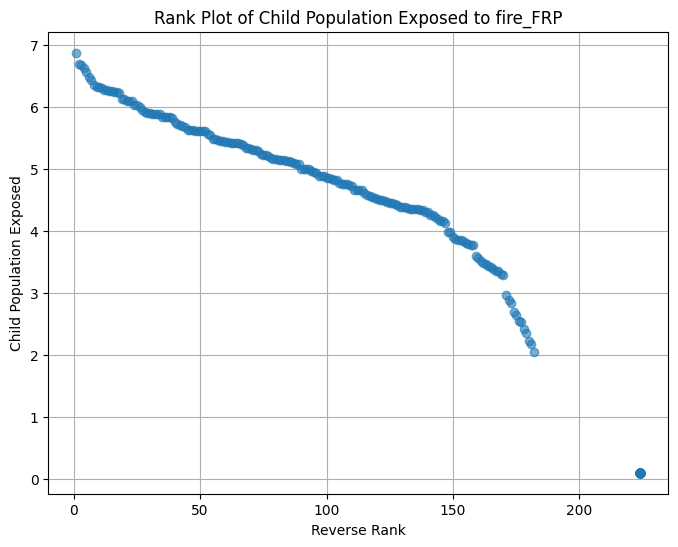

processed : heatwave_duration min: 0.1 max: 8.016302587963166
heatwave_duration: Log Transformation and Scaling - skew=-0.909, kurtosis=-0.496
IQR processed : heatwave_duration min: -0.5736009265185436 max: 10.69296198416972


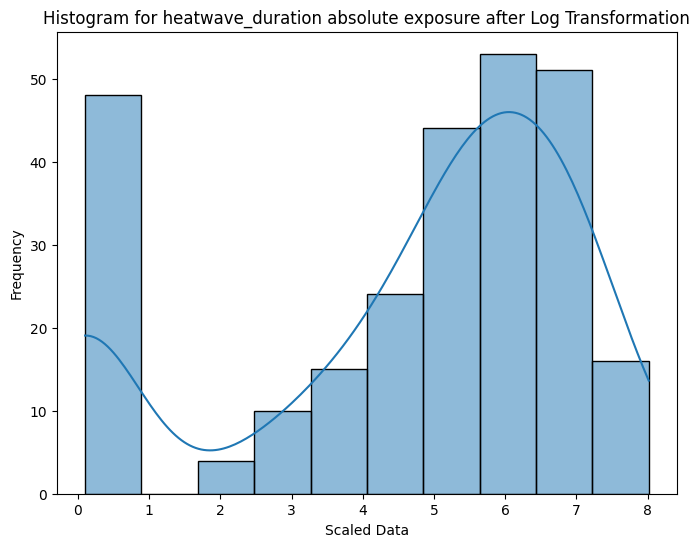

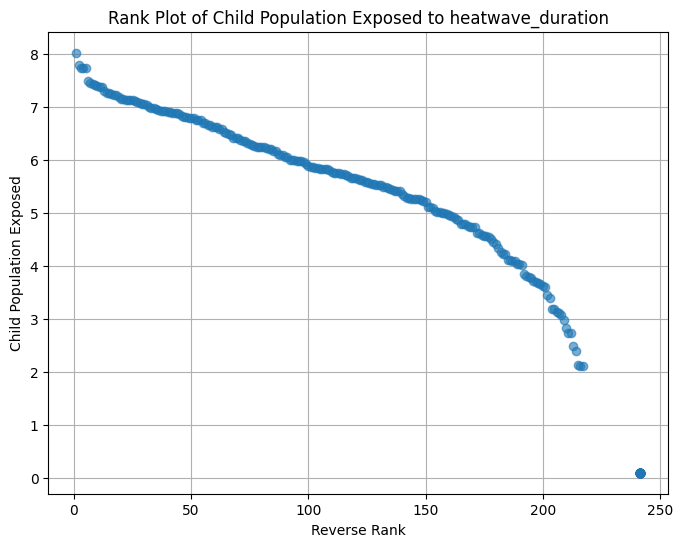

processed : heatwave_frequency min: 0.1 max: 7.95440958366867
heatwave_frequency: Log Transformation and Scaling - skew=-0.938, kurtosis=-0.538
IQR processed : heatwave_frequency min: -0.6490391680139114 max: 10.818692386662


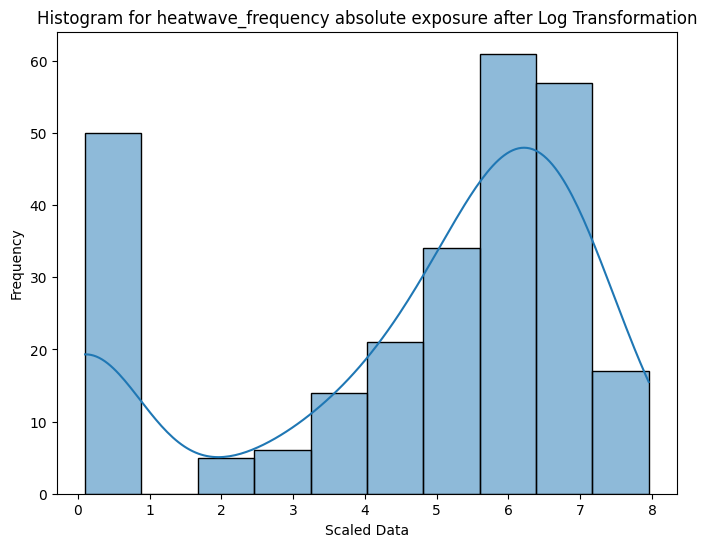

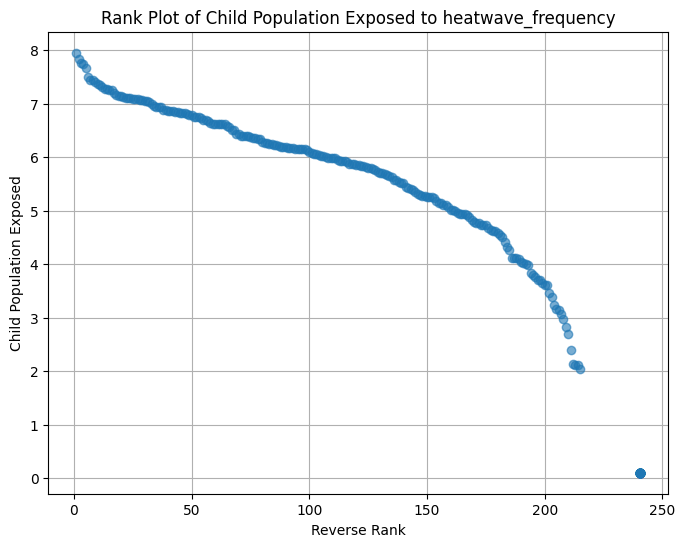

processed : heatwave_severity min: 0.1 max: 8.034541177391322
heatwave_severity: Log Transformation and Scaling - skew=0.843, kurtosis=-1.053
IQR processed : heatwave_severity min: -6.977692107812649 max: 11.89615351302108


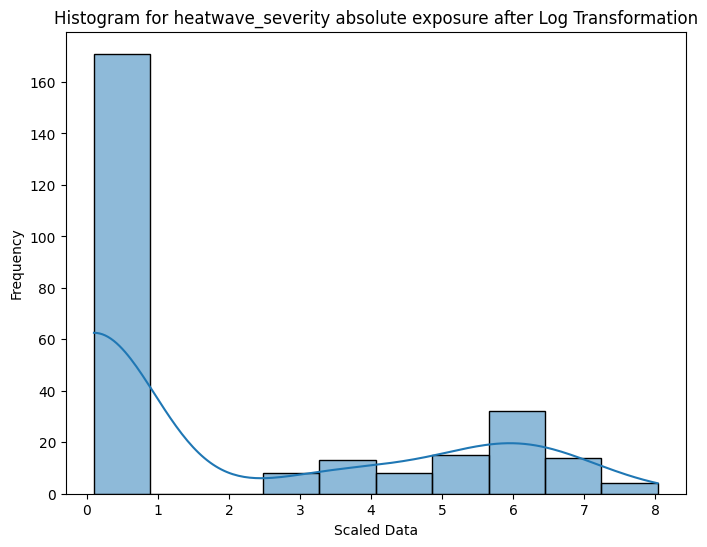

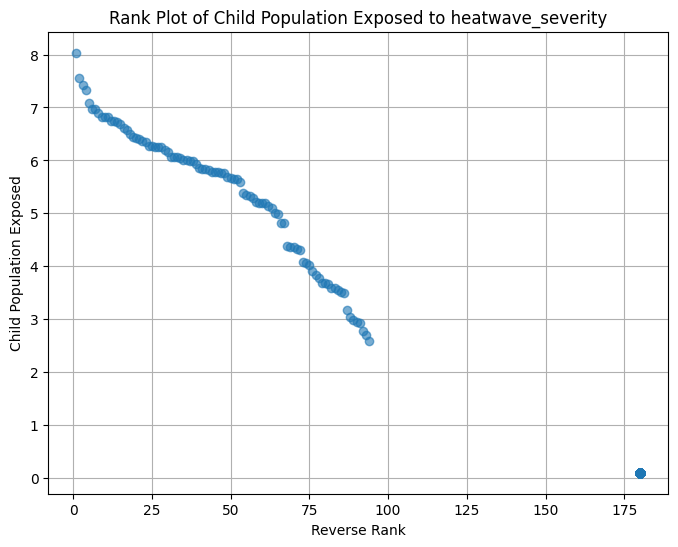

processed : river_flood min: 0.1 max: 7.874335180216161
river_flood: Log Transformation and Scaling - skew=-0.310, kurtosis=-1.555
IQR processed : river_flood min: -8.071166587342443 max: 13.71861097890407


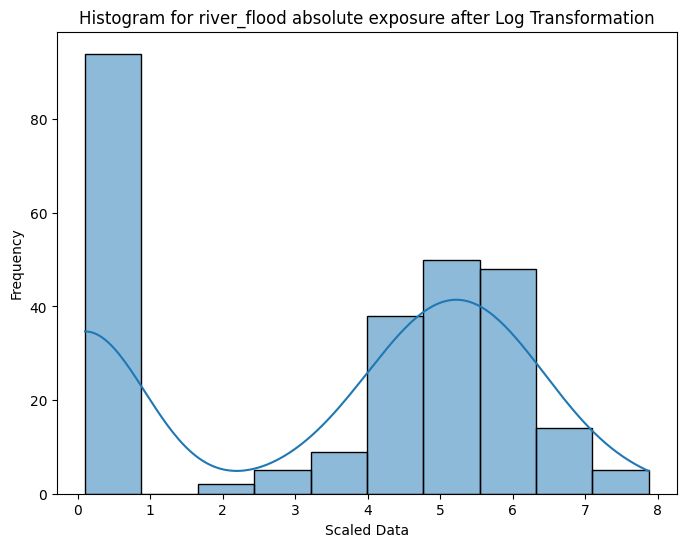

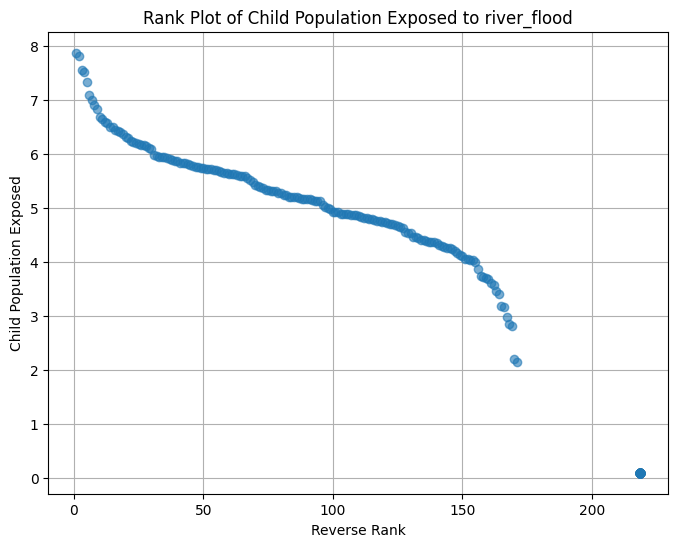

processed : sand_dust min: 0.1 max: 7.2067952213874555
sand_dust: Log Transformation and Scaling - skew=0.176, kurtosis=-1.380
IQR processed : sand_dust min: -6.7349309249749325 max: 11.491551541624887


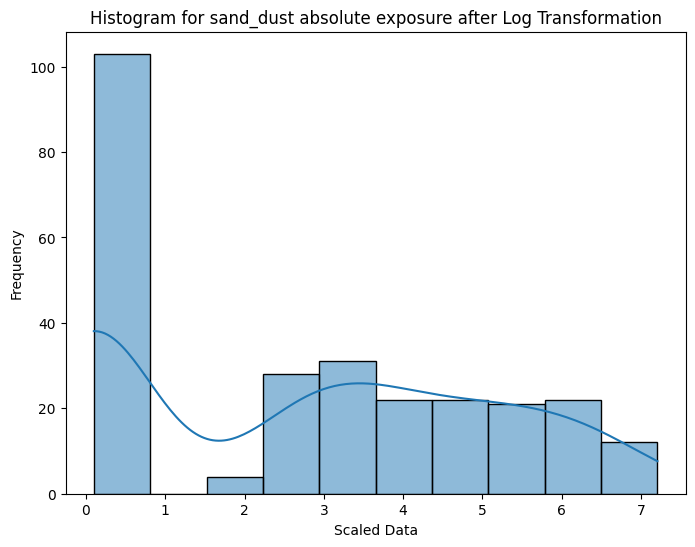

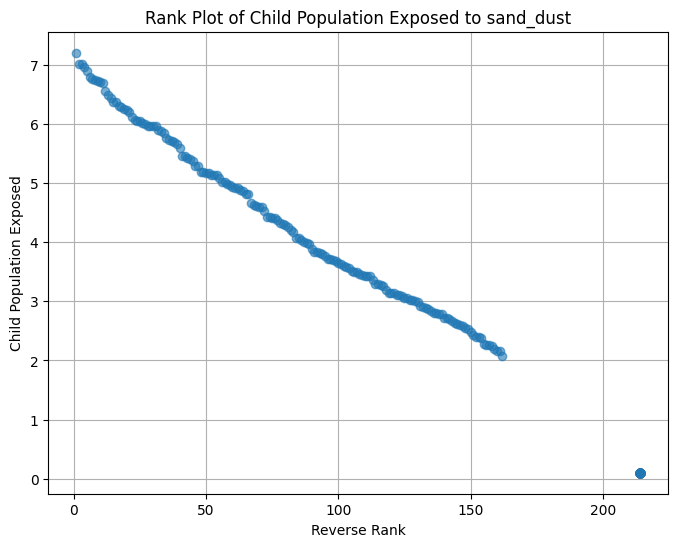

processed : tropical_storm min: 0.1 max: 8.193693998719269
tropical_storm: Log Transformation and Scaling - skew=0.588, kurtosis=-1.336
IQR processed : tropical_storm min: -7.163401923028333 max: 12.205669871713887


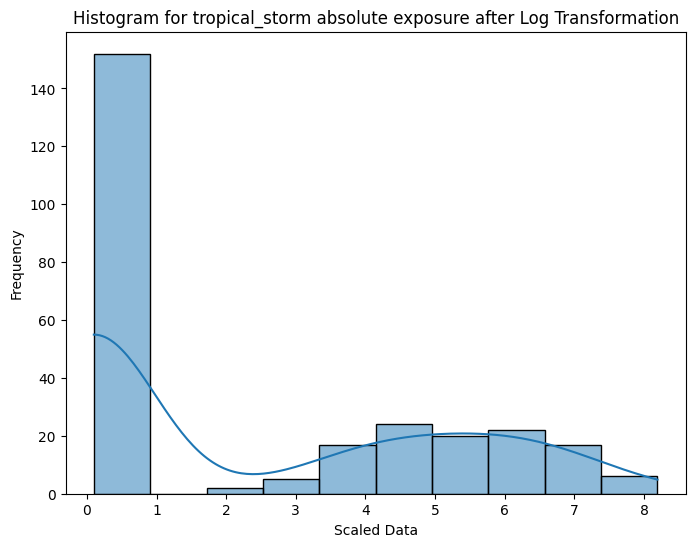

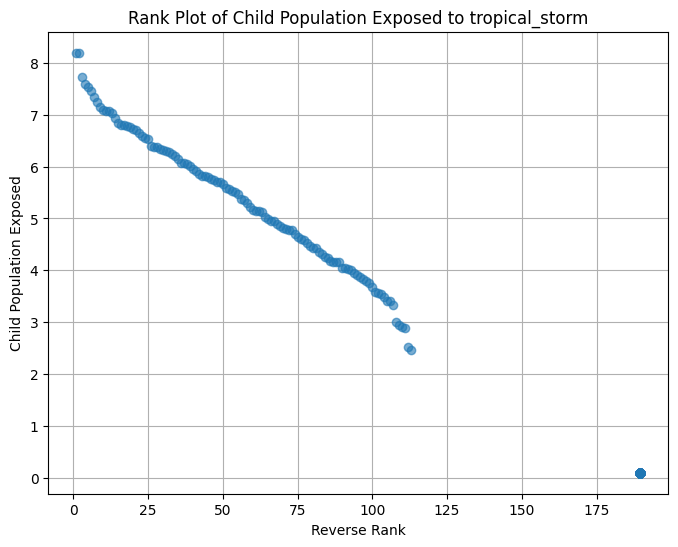

processed : vectorborne_malariapf min: 0.1 max: 8.043412938922371
vectorborne_malariapf: Log Transformation and Scaling - skew=0.896, kurtosis=-1.000
IQR processed : vectorborne_malariapf min: -7.1089977296443205 max: 12.114996216073866


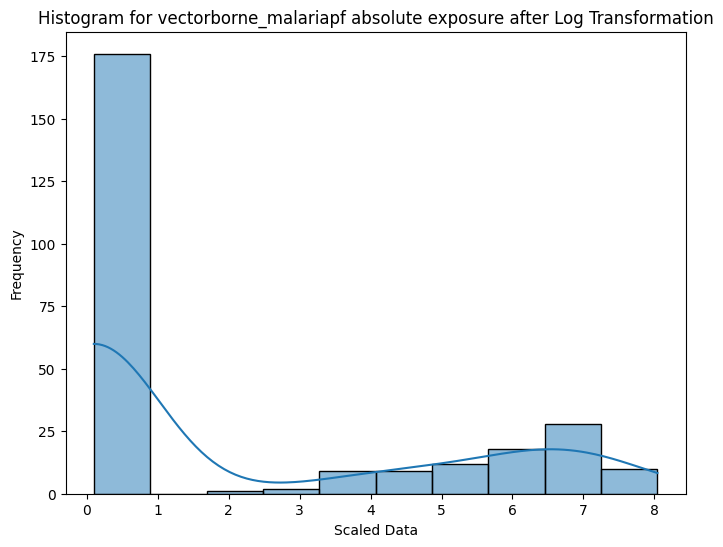

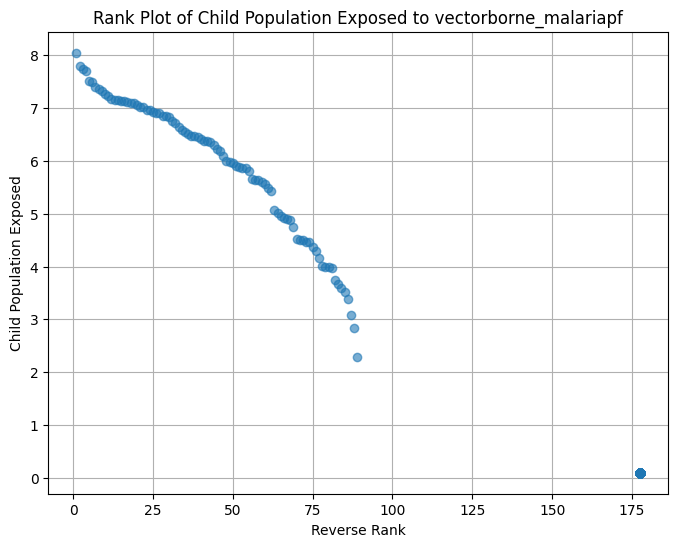

processed : vectorborne_malariapv min: 0.1 max: 8.523129030977277
vectorborne_malariapv: Log Transformation and Scaling - skew=1.670, kurtosis=1.122
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


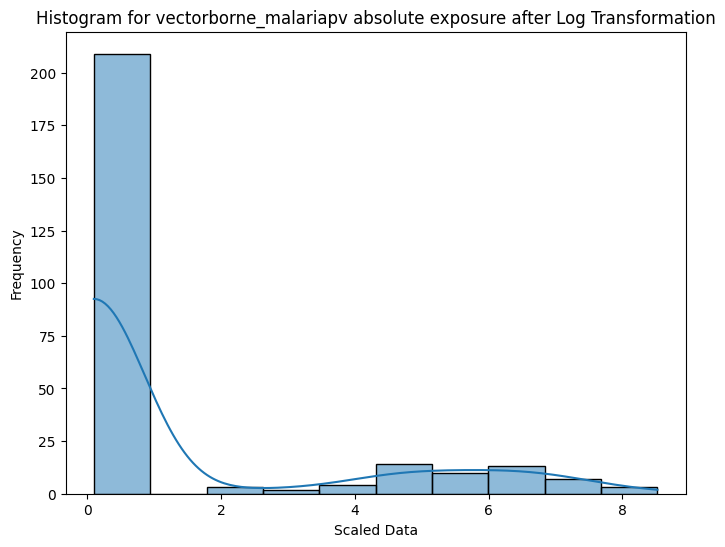

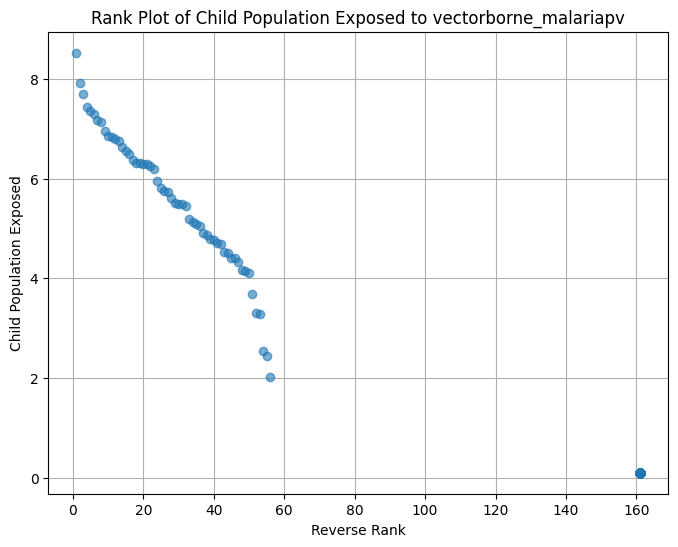

In [24]:

# Folder containing the CSV files
path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if iso3_name not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[[iso3_name, 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
100.0
Processed: agricultural_drought | Min: 0.00049404139838649 | Max: 94.21302748814966
agricultural_drought: Log Transformation - skew=0.096, kurtosis=-1.187
IQR processed : agricultural_drought min: -3248219.5791347465 max: 5413699.298557911


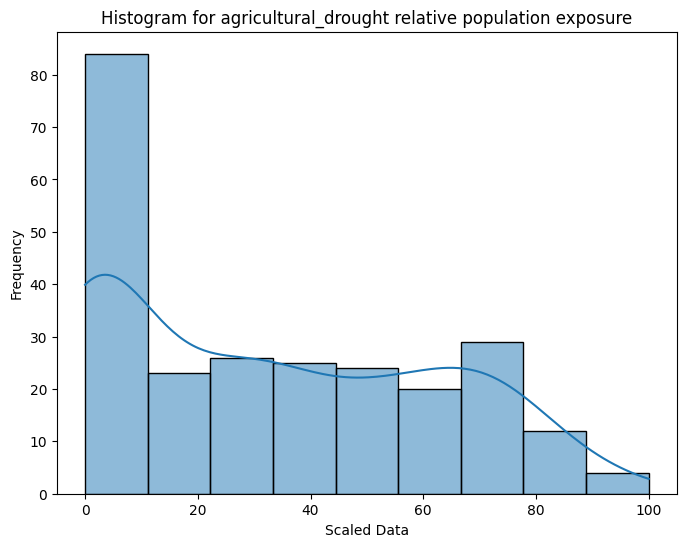

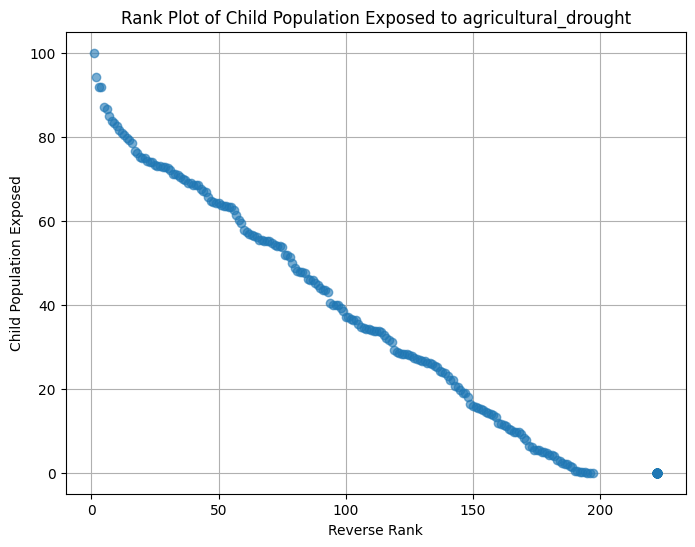

0.0
100.00000000000003
Processed: air_pollution | Min: 0.39360965596940967 | Max: 100.0
air_pollution: Log Transformation - skew=-1.895, kurtosis=2.856
IQR processed : air_pollution min: -9438435.049955297 max: 15757418.443902927


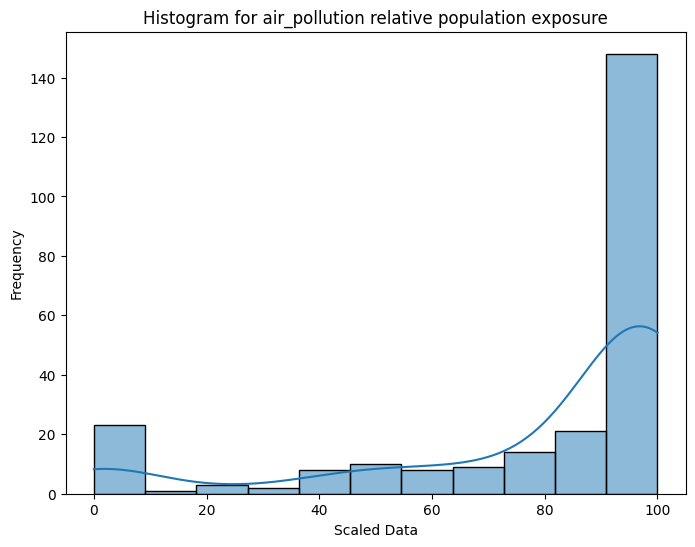

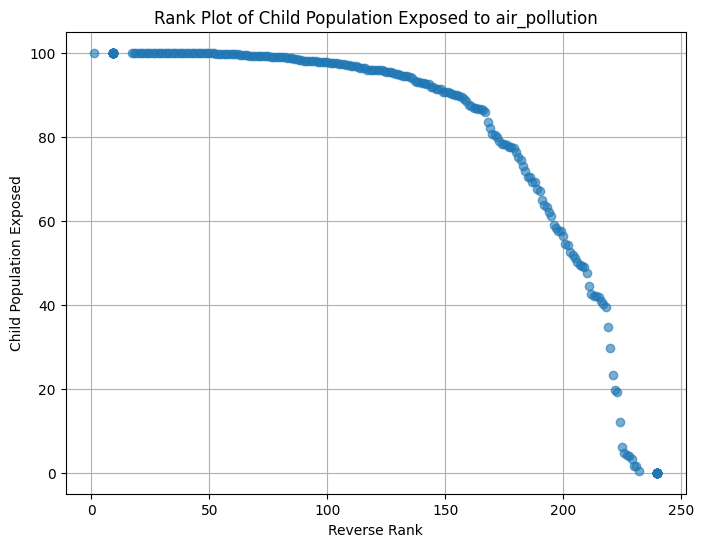

0.0
46.50262157425799
Processed: coastal_flood | Min: 0.03192110387637481 | Max: 3.625860645402796
coastal_flood: Log Transformation - skew=1.749, kurtosis=2.286
IQR processed : coastal_flood min: -9411.143170881041 max: 15685.238618135068


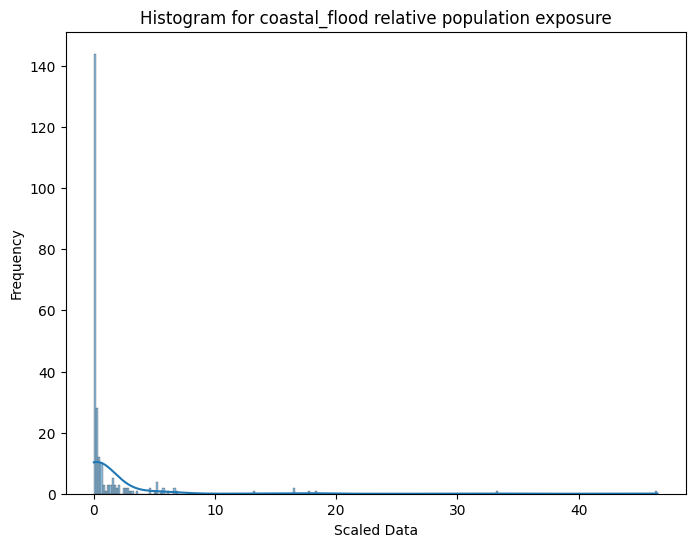

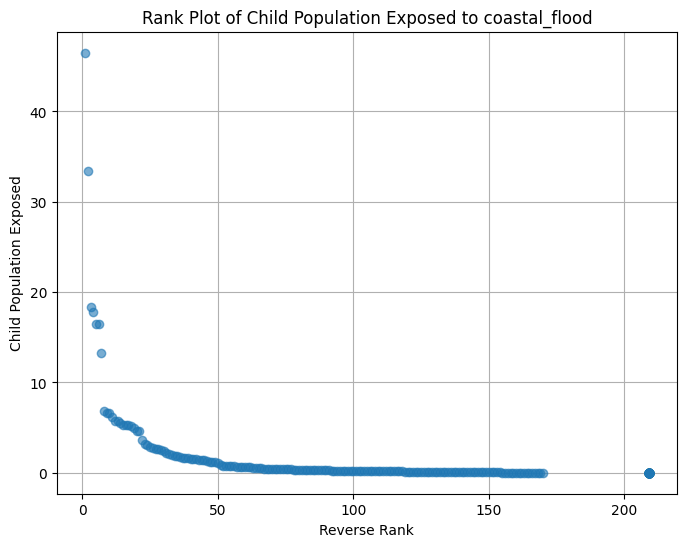

0.0
100.0
Processed: drought_spei | Min: 0.007305846905977214 | Max: 99.99998939627184
drought_spei: Log Transformation - skew=0.723, kurtosis=-0.994
IQR processed : drought_spei min: -2297095.2735843277 max: 3828492.122640546


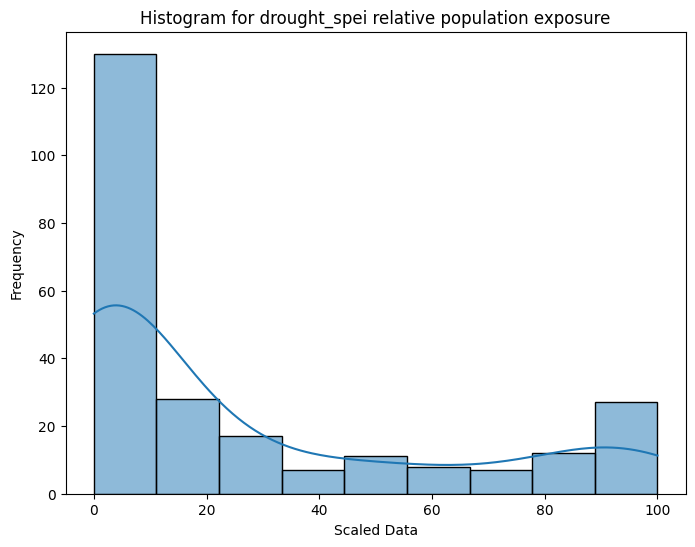

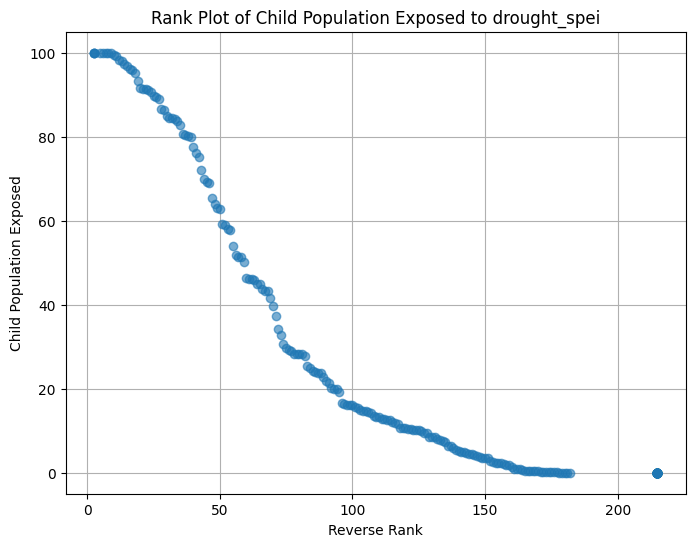

0.0
100.00000000000003
Processed: drought_spi | Min: 0.011320895688519399 | Max: 100.0
drought_spi: Log Transformation - skew=0.154, kurtosis=-1.576
IQR processed : drought_spi min: -2685769.074875273 max: 4476281.791458787


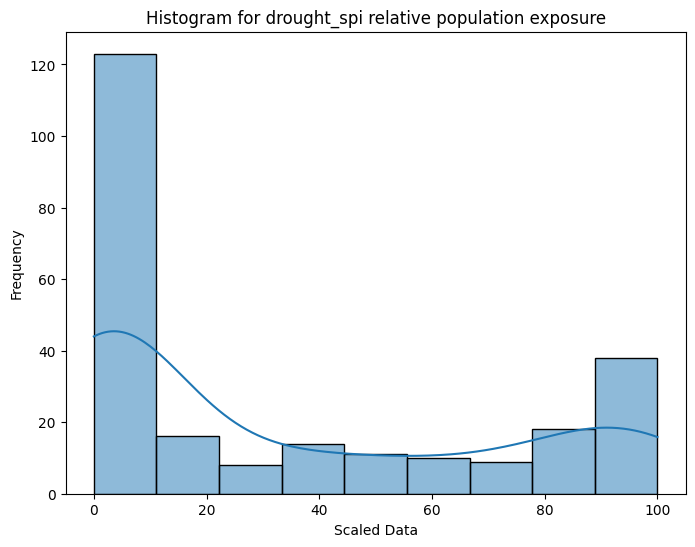

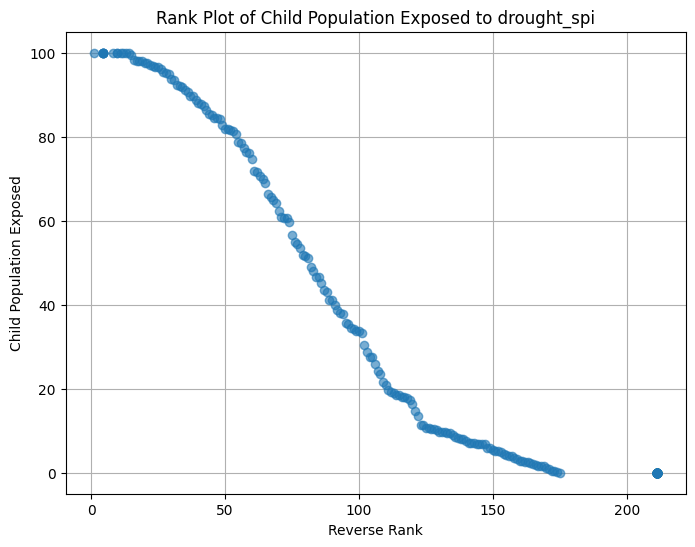

0.0
100.0
Processed: extreme_heat | Min: 0.012437411614797157 | Max: 99.9847139929213
extreme_heat: Log Transformation - skew=0.381, kurtosis=-1.325
IQR processed : extreme_heat min: -2159446.8155357316 max: 3599078.0258928863


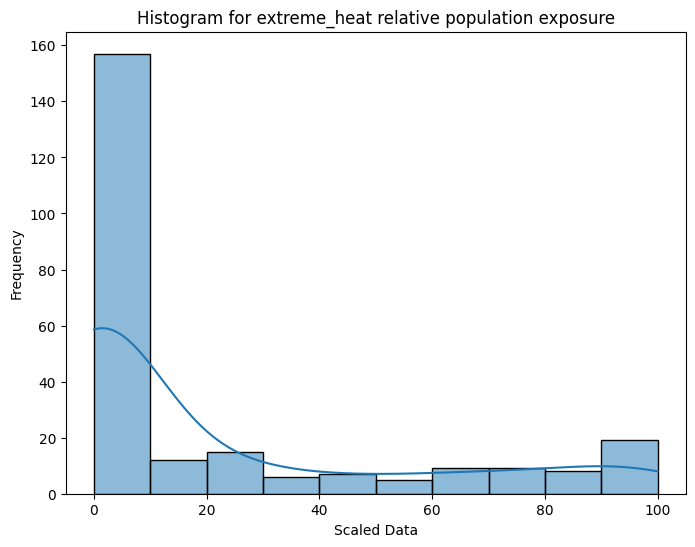

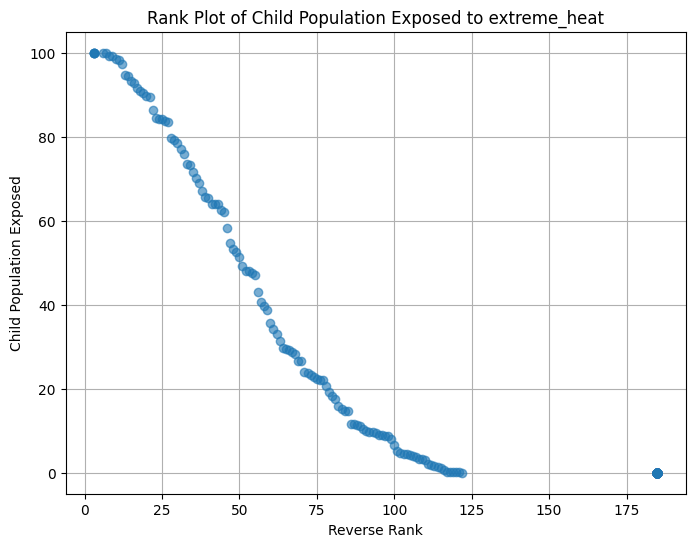

0.0
72.02419168001568
Processed: fire_frequency | Min: 0.07647302903689814 | Max: 27.695859224458886
fire_frequency: Log Transformation - skew=1.843, kurtosis=3.378
IQR processed : fire_frequency min: -231689.3267364059 max: 386148.8778940098


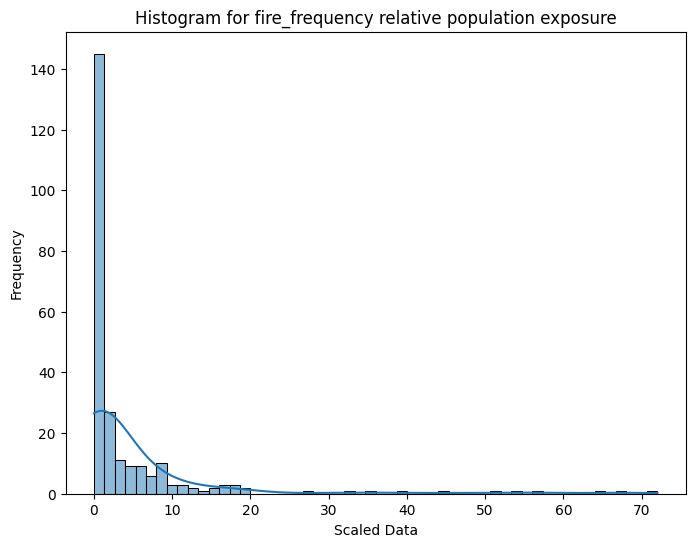

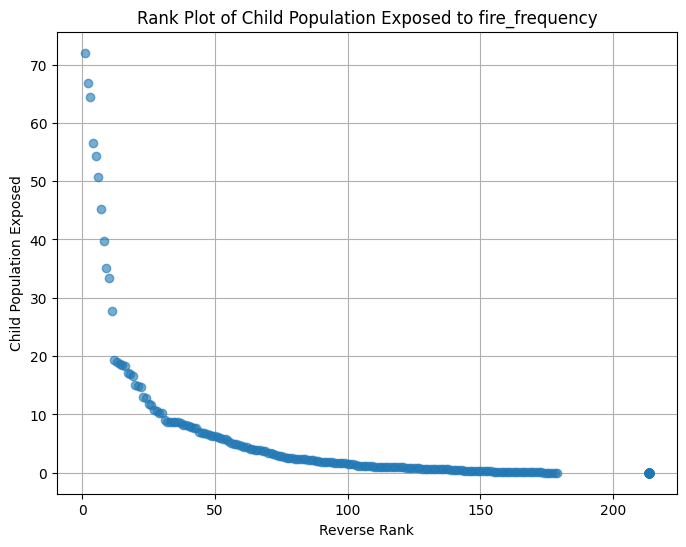

0.0
49.5484784524173
Processed: fire_FRP | Min: 0.08265007763966647 | Max: 22.17738626410973
fire_FRP: Log Transformation - skew=1.740, kurtosis=3.325
IQR processed : fire_FRP min: -362734.56094814144 max: 604557.6015802358


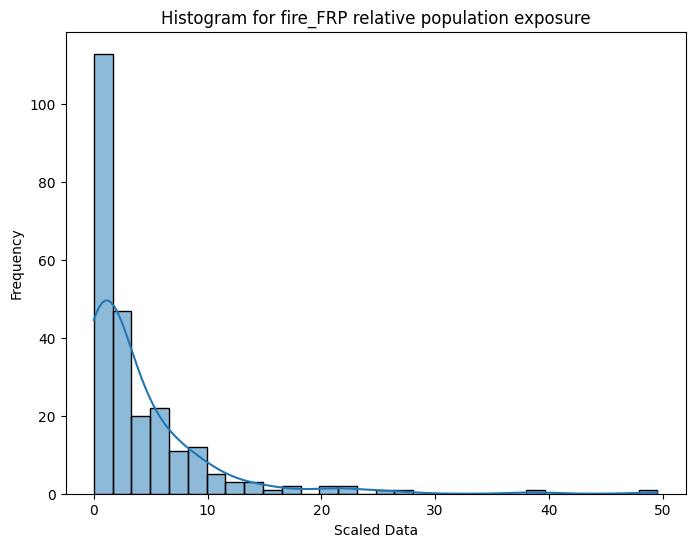

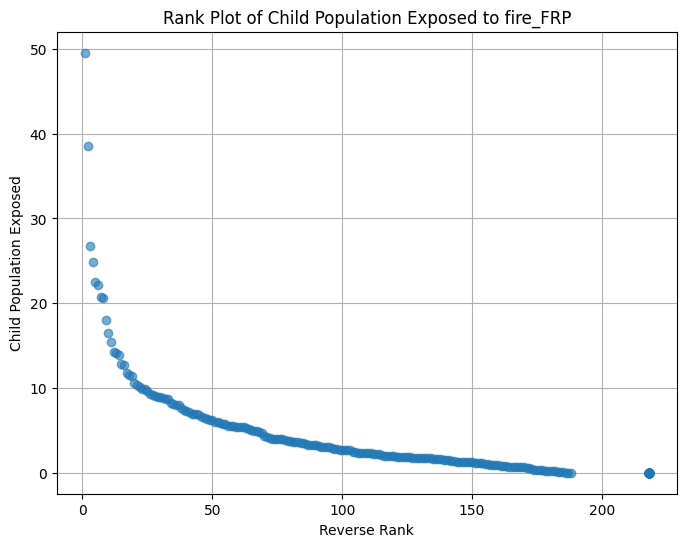

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.021840592459180064 | Max: 100.0
heatwave_duration: Log Transformation - skew=-0.363, kurtosis=-1.292
IQR processed : heatwave_duration min: -4395281.416360102 max: 7337417.953974513


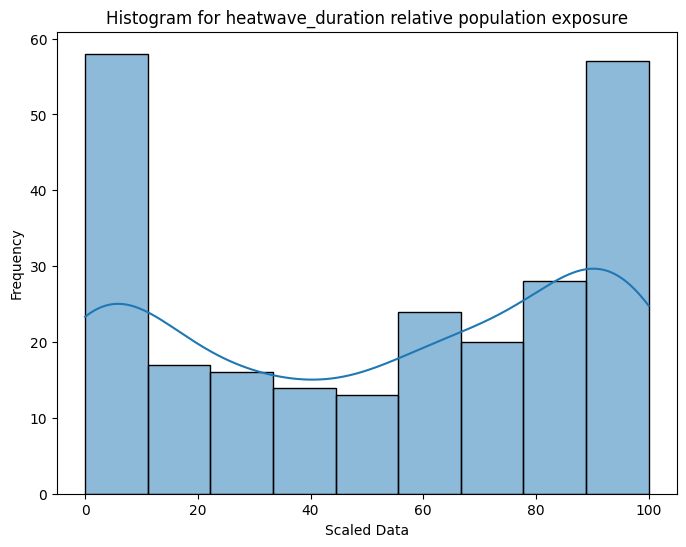

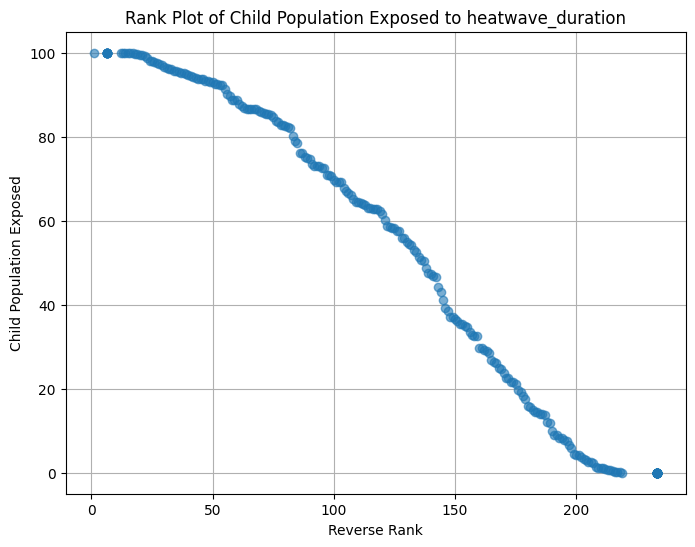

0.0
100.0
Processed: heatwave_frequency | Min: 0.0526432078677873 | Max: 99.9998517577724
heatwave_frequency: Log Transformation - skew=-0.504, kurtosis=-1.114
IQR processed : heatwave_frequency min: -4936280.905230666 max: 8239083.768758787


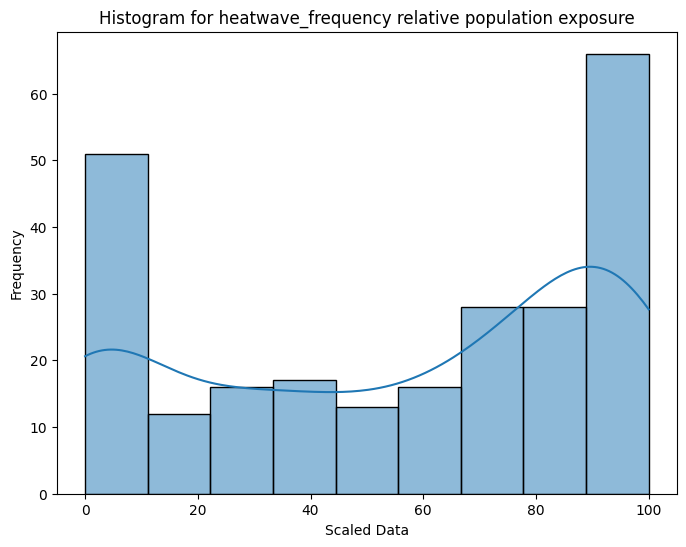

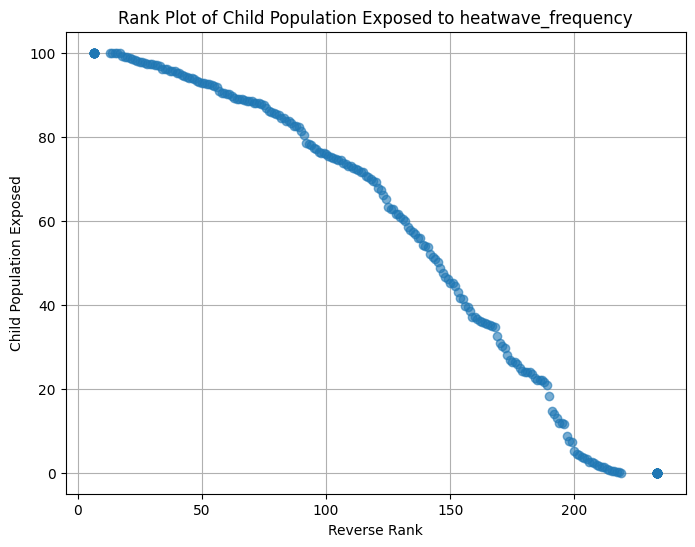

0.0
99.99980625844033
Processed: heatwave_severity | Min: 1.2079844149419732e-06 | Max: 99.41185857976882
heatwave_severity: Log Transformation - skew=0.712, kurtosis=-0.954
IQR processed : heatwave_severity min: -98753.53809268762 max: 164589.2301544794


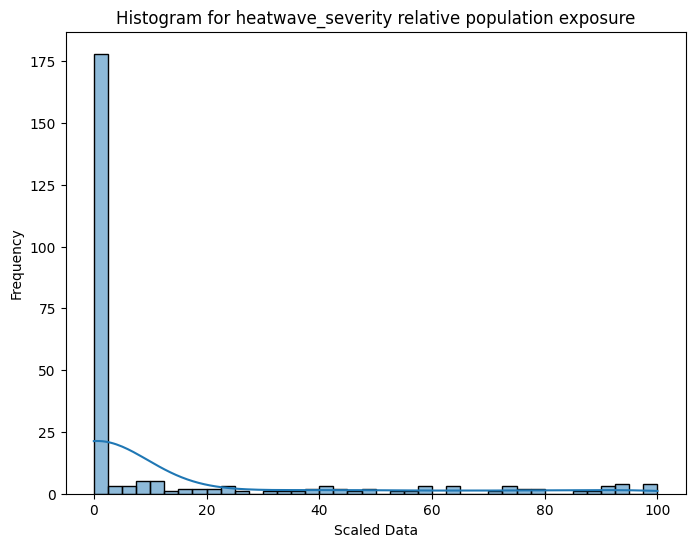

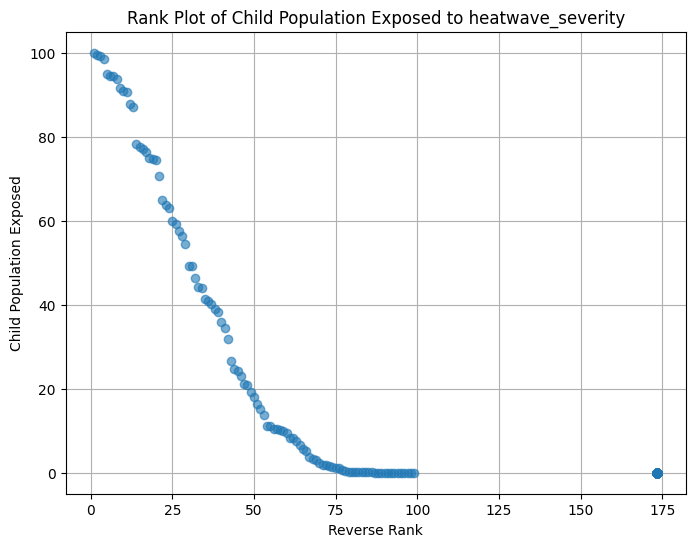

0.0
75.90558463812013
Processed: river_flood | Min: 0.29290896698238617 | Max: 33.22905134643027
river_flood: Log Transformation - skew=1.754, kurtosis=3.263
IQR processed : river_flood min: -529097.4282835143 max: 881829.0471391906


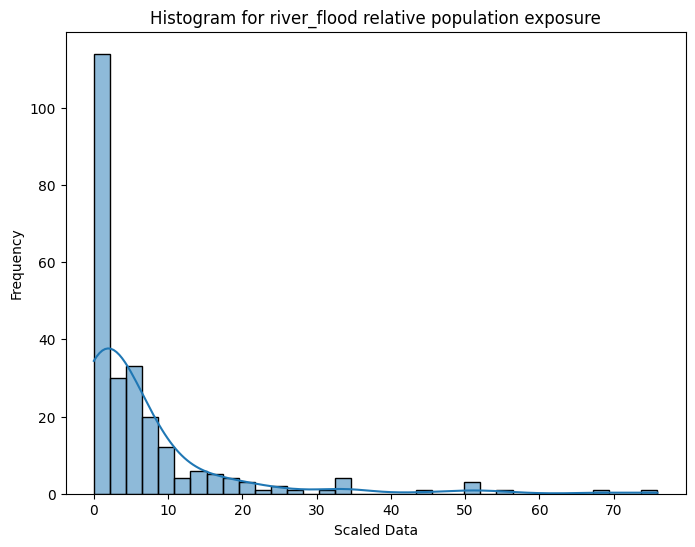

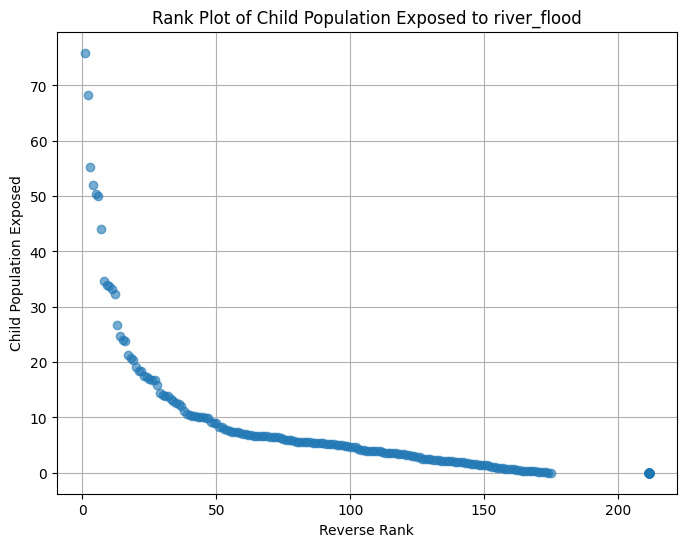

0.0
100.0
Processed: sand_dust | Min: 0.011413138048835657 | Max: 12.433790072941857
sand_dust: Log Transformation - skew=1.938, kurtosis=2.932
IQR processed : sand_dust min: -68031.78651819596 max: 113386.31086365994


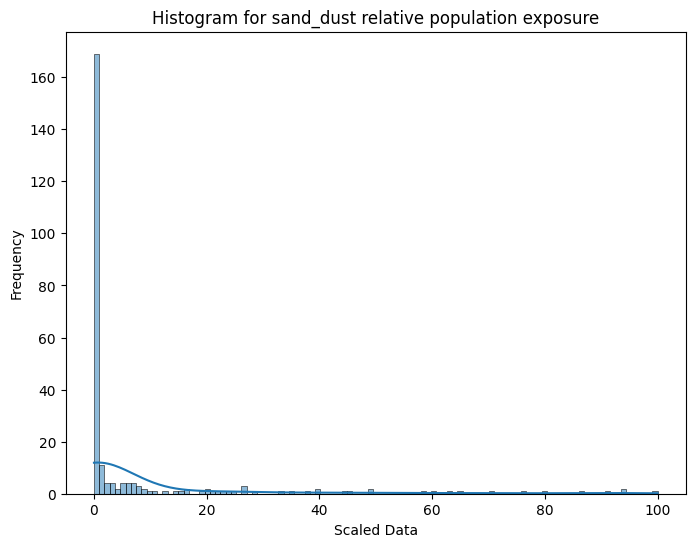

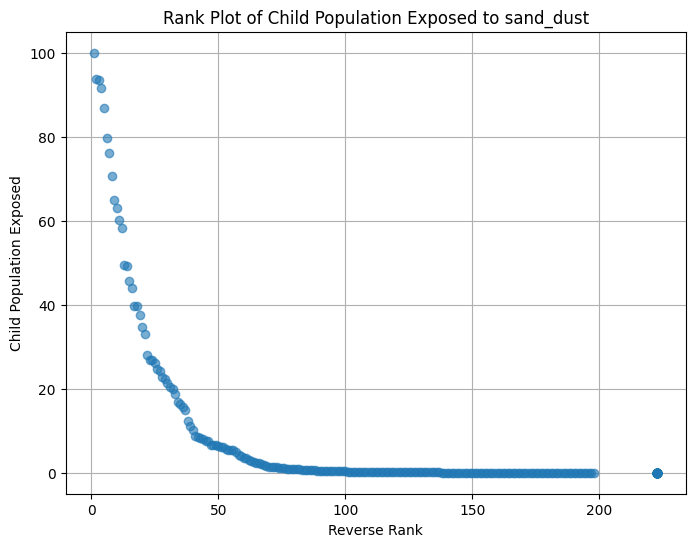

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.593191630639294e-05 | Max: 100.0
tropical_storm: Log Transformation - skew=-1.080, kurtosis=-0.531
IQR processed : tropical_storm min: -131328.56769059948 max: 218880.94615099914


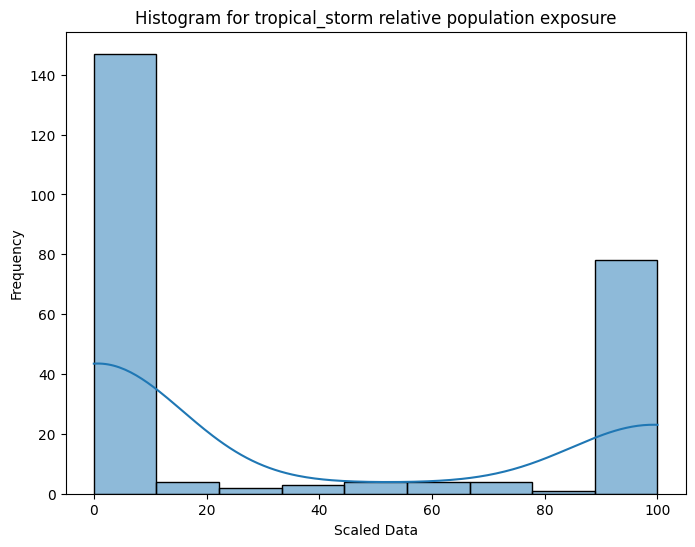

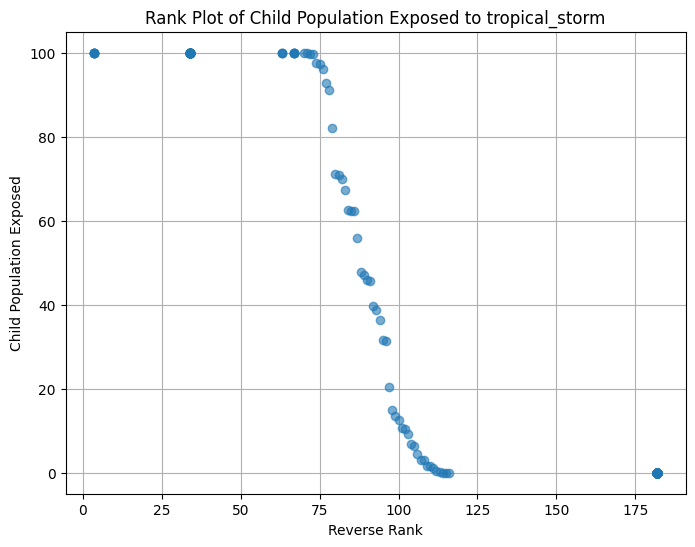

0.0
100.0
Processed: vectorborne_malariapf | Min: 0.00010724430067593195 | Max: 99.99999999999997
vectorborne_malariapf: Log Transformation - skew=-0.187, kurtosis=-1.810
IQR processed : vectorborne_malariapf min: -120806.34515394123 max: 201343.90858990204


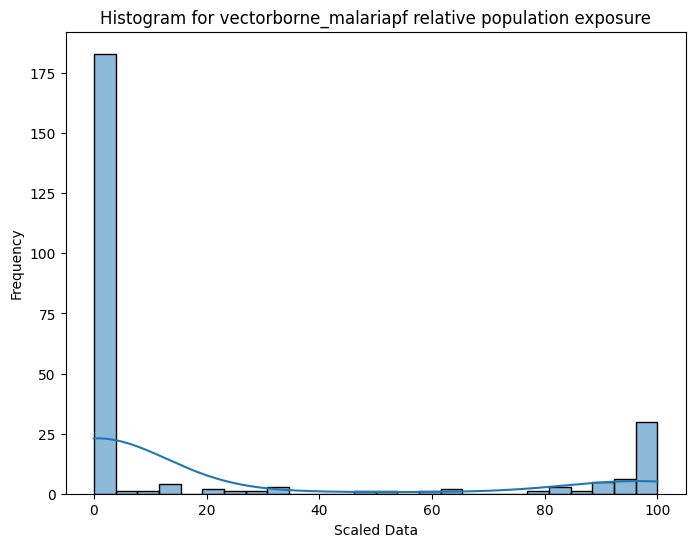

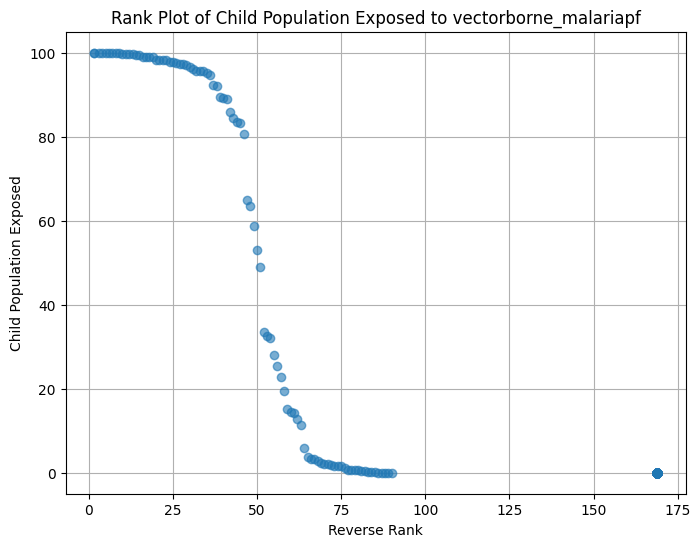

0.0
99.99443003373085
Processed: vectorborne_malariapv | Min: 0.00034037147328052855 | Max: 99.9367858287605
vectorborne_malariapv: Log Transformation - skew=0.495, kurtosis=-1.502
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


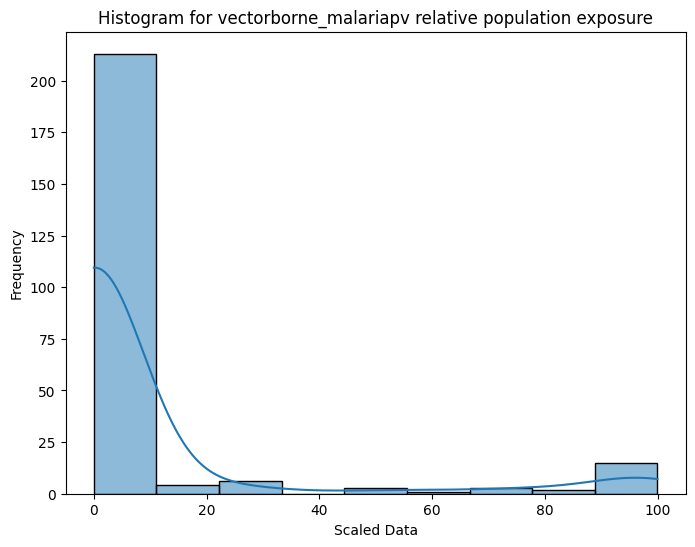

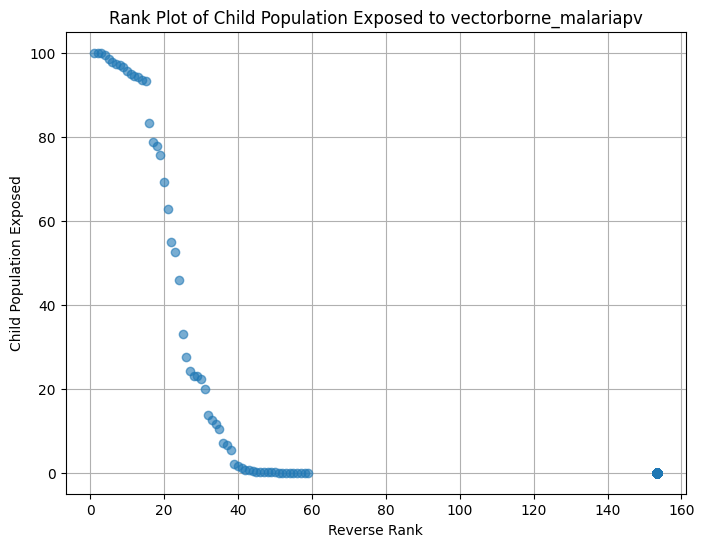

In [25]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if iso3_name not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[[iso3_name, 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [26]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = f'{data_dir}/p1_exposure'

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    df =  df[df['type'] == 'State'] #filter out areas other than 'State'
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {iso3_name, adm_name, 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv(f'{data_dir}/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)
    # Calculate 5th and 95th percentiles
    # lower_percentile = df['absolute_exposure'].quantile(0.05)
    # upper_percentile = df['absolute_exposure'].quantile(0.95)

    # # Clip values to within the percentile range
    # df['absolute_exposure'] = np.clip(df['absolute_exposure'], lower_percentile, upper_percentile)


    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    # #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)

    # lower_percentile = df['relative_exposure'].quantile(0.05)
    # upper_percentile = df['relative_exposure'].quantile(0.95)

    # Clip values to within the percentile range
    # df['relative_exposure'] = np.clip(df['relative_exposure'], lower_percentile, upper_percentile)

    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    #If absolute value is zero, relative is also zero
    df.loc[df['absolute_value_normalized'] == 0, 'relative_value_normalized'] = 0
    df.loc[df['relative_value_normalized'] == 0, 'absolute_value_normalized'] = 0

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[[iso3_name, adm_name,
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=[iso3_name, adm_name])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]
merged_exposure_df = merged_exposure_df.rename(columns={iso3_name: "iso3"})

# Save merged exposure data
output_path = f"{data_dir}/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI/ccri_repo/data/CCRI_results_misc/Merged_Exposure_Data.csv
